In [ ]:
# Set cuda device to 3
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "3"

import PIL
import requests
import torch
from io import BytesIO
from diffusers import PaintByExamplePipeline
from PIL import Image, ImageChops

def download_image(url):
    response = requests.get(url)
    return PIL.Image.open(BytesIO(response.content)).convert("RGB")


img_url = (
    "https://raw.githubusercontent.com/Fantasy-Studio/Paint-by-Example/main/examples/image/example_1.png"
)
mask_url = (
    "https://raw.githubusercontent.com/Fantasy-Studio/Paint-by-Example/main/examples/mask/example_1.png"
)
example_url = "https://raw.githubusercontent.com/Fantasy-Studio/Paint-by-Example/main/examples/reference/example_1.jpg"

#open image from /home/sanoojan/e4s/example/input/faceswap/source.jpg

init_image= PIL.Image.open("/home/sanoojan/e4s/example/input/faceswap/andy/546.jpg").convert("RGB").resize((512, 512))
example_image= PIL.Image.open("/home/sanoojan/e4s/example/input/faceswap/peng/peng_800.jpg").convert("RGB").resize((512, 512))
mask_image= PIL.Image.open("/home/sanoojan/e4s/data/FaceData/CelebAMask-HQ/CelebA-HQ-mask/0/00000_skin.png").convert("RGB").resize((512, 512))
mask_mouth=PIL.Image.open("/home/sanoojan/e4s/data/FaceData/CelebAMask-HQ/CelebA-HQ-mask/0/00000_mouth.png").convert("RGB").resize((512, 512))
mask_image=ImageChops.subtract(mask_image,mask_mouth)


# init_image = download_image(img_url).resize((512, 512))
# mask_image = download_image(mask_url).resize((512, 512))
# example_image = download_image(example_url).resize((512, 512))

pipe = PaintByExamplePipeline.from_pretrained(
    "Fantasy-Studio/Paint-by-Example",
    torch_dtype=torch.float16,
)
pipe = pipe.to("cuda")

image = pipe(image=init_image, mask_image=mask_image, example_image=example_image).images[0]

# plot the image, init_image, mask_image, example_image as subplots side by side

import matplotlib.pyplot as plt
fig, axs = plt.subplots(1, 4, figsize=(18, 30))
axs[0].imshow(init_image)
axs[0].set_title('init_image')
axs[1].imshow(mask_image)
axs[1].set_title('mask_image')
axs[2].imshow(example_image)
axs[2].set_title('example_image')
axs[3].imshow(image)
axs[3].set_title('image')




# image

In [1]:
import cv2
import numpy as np

# Load the binary mask image
mask = cv2.imread('dataset/FaceData/CelebAMask-HQ/CelebA-HQ-mask/1/02000_skin.png', cv2.IMREAD_GRAYSCALE)

# Define a kernel for morphology operations
kernel = np.ones((5, 5), np.uint8)

# Perform dilation to expand the white regions, which can change the shape slightly
dilated_mask = cv2.dilate(mask, kernel, iterations=1)

# Perform erosion to shrink the white regions, which can also change the shape slightly
eroded_mask = cv2.erode(mask, kernel, iterations=1)

# You can save the modified mask to a new file
cv2.imwrite('modified_mask.png', dilated_mask)  # or 'modified_mask.png', eroded_mask

# You may need to experiment with the kernel size and the number of iterations to achieve the desired shape modification.


True

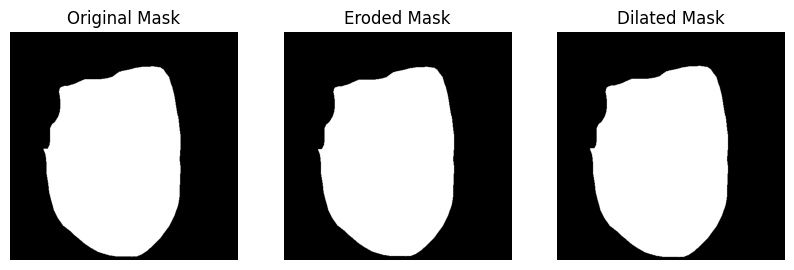

In [2]:
import matplotlib.pyplot as plt
from skimage import io, morphology

# Load the binary mask image
mask = io.imread('dataset/FaceData/CelebAMask-HQ/CelebA-HQ-mask/1/02000_skin.png', as_gray=True)

# Use binary erosion and dilation to modify the shape
eroded_mask = morphology.binary_erosion(mask)
dilated_mask = morphology.binary_dilation(mask)

# Display the original and modified masks
fig, axes = plt.subplots(1, 3, figsize=(10, 4))
ax = axes.ravel()

ax[0].imshow(mask, cmap='gray')
ax[0].set_title('Original Mask')

ax[1].imshow(eroded_mask, cmap='gray')
ax[1].set_title('Eroded Mask')

ax[2].imshow(dilated_mask, cmap='gray')
ax[2].set_title('Dilated Mask')

for a in ax:
    a.axis('off')

plt.show()
# Make sure you have the scikit-image library installed (pip install scikit-image) before running this script. Adjust the parameters and techniques used to achieve the desired shape modification. You'll need to provide the path to your mask image in the io.imread function.







In [3]:
import cv2
import numpy as np

# Load the mask image
mask = cv2.imread('dataset/FaceData/CelebAMask-HQ/CelebA-HQ-mask/1/02000_skin.png', cv2.IMREAD_GRAYSCALE)

# Define the transformation matrix
rows, cols = mask.shape
M = np.float32([[1, 0, 50], [0, 1, 50]])  # Example transformation matrix for shifting

# Apply the transformation to the mask
transformed_mask = cv2.warpAffine(mask, M, (cols, rows))

# You can save the transformed mask to a new file
cv2.imwrite('transformed_mask.png', transformed_mask)


True

In [11]:
import cv2
import numpy as np

# Load the binary mask image
mask = cv2.imread('dataset/FaceData/CelebAMask-HQ/CelebA-HQ-mask/1/02000_skin.png', cv2.IMREAD_GRAYSCALE)

# Define the number of iterations for dilation and erosion
expand_iterations = np.random.randint(2, 5)  # Randomly select the number of iterations for dilation
shrink_iterations = np.random.randint(2, 5)  # Randomly select the number of iterations for erosion
expand_iterations=7
shrink_iterations=10
# Randomly expand the white regions
expanded_mask = cv2.dilate(mask, None, iterations=expand_iterations)

# Randomly shrink the white regions
shrink_mask = cv2.erode(expanded_mask, None, iterations=shrink_iterations)

# You can save the modified mask to a new file
cv2.imwrite('modified_mask.png', shrink_mask)


True

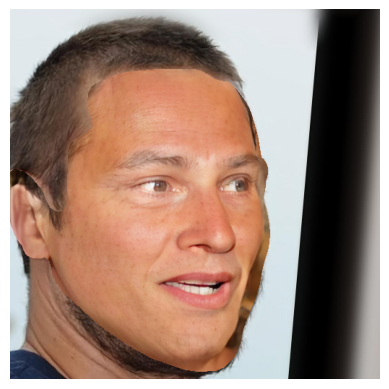

In [25]:
import dlib
import cv2
import matplotlib.pyplot as plt
import numpy as np
from PIL import Image

# Load the image
image_path = 'dataset/FaceData/CelebAMask-HQ/Val_target/28000.jpg'  # Replace with the actual image path
second_image_path='/home/sanoojan/e4s/Results/testbench/reenact/results/29000.png'





mask_path='dataset/FaceData/CelebAMask-HQ/target_mask/28000.png'
preserve=[1,2,4,5,8,9 ,6,7,10,11,12 ]

mask_img = Image.open(mask_path).convert('L')
mask_img = np.array(mask_img)  # Convert the label to a NumPy array if it's not already

# Create a mask to preserve values in the 'preserve' list
# preserve = [1,2,4,5,8,9,17 ]
# preserve = self.preserve
mask = np.isin(mask_img, preserve)

# Create a converted_mask where preserved values are set to 255
converted_mask = np.zeros_like(mask_img)
converted_mask[mask] = 255
# convert to PIL image
# mask_img=Image.fromarray(converted_mask).convert('L')


image = cv2.imread(image_path)

#reshape to 25
image = cv2.resize(image, (512, 512))

second_image = cv2.imread(second_image_path)
second_image = cv2.resize(second_image, (512, 512))

# replace the image with the second image where the mask is 255
second_image[converted_mask == 0] = image[converted_mask == 0]

#


# display mask_img
# plt.imshow(mask_img, cmap='gray')

# # Display the image with landmarks
plt.imshow(cv2.cvtColor(second_image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [ ]:
pil_im = T.resize((1024,1024), Image.BILINEAR)
mask = faceParsing_demo(faceParsing_model, pil_im, convert_to_seg12=opt.seg12, model_name=opt.faceParser_name)

0 260 397
1 51 238
2 54 286
3 58 333
4 71 377
5 97 413
6 136 442
7 178 466
8 221 483
9 262 485
10 292 472
11 307 442
12 318 408
13 327 374
14 336 341
15 345 308
16 345 276
17 340 247
18 143 220
19 168 205
20 196 201
21 224 203
22 251 210
23 297 213
24 312 205
25 327 201
26 340 202
27 346 214
28 277 244
29 284 268
30 291 291
31 298 315
32 252 333
33 269 337
34 285 341
35 299 338
36 308 332
37 176 244
38 196 238
39 214 237
40 224 249
41 212 253
42 195 252
43 291 250
44 305 240
45 320 238
46 326 246
47 319 252
48 306 253
49 205 381
50 235 368
51 264 364
52 280 367
53 294 364
54 308 368
55 312 379
56 305 399
57 292 411
58 276 414
59 259 413
60 231 403
61 216 381
62 263 375
63 279 378
64 293 375
65 305 379
66 292 393
67 277 397


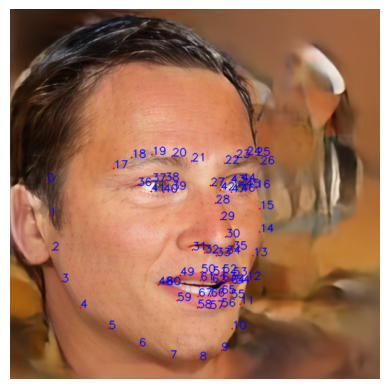

In [14]:
import dlib
import cv2
import matplotlib.pyplot as plt

# Load the image
image_path = '/home/sanoojan/e4s/Results/testbench/reenact/results/29000.png'  # Replace with the actual image path
image = cv2.imread(image_path)
image = cv2.resize(image, (512, 512))
# Initialize the face detector and the landmark predictor
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("Other_dependencies/DLIB_landmark_det/shape_predictor_68_face_landmarks.dat") # Replace with the actual path to the shape predictor file

# Convert the image to grayscale for processing
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Detect faces in the grayscale image
faces = detector(gray)

# Iterate through the faces found in the image
for face in faces:
    # Find the facial landmarks for the face region
    landmarks = predictor(gray, face)
    
    # Loop over the landmarks and draw them on the image
    for i, landmark in enumerate(landmarks.parts()):
        print(i, x, y)
        x, y = landmark.x, landmark.y
        cv2.circle(image, (x, y), 1, (0, 0, 255), -1)  # Draw a small red circle on the image
        cv2.putText(image, str(i), (x, y), cv2.FONT_HERSHEY_SIMPLEX, 0.5, (255, 0, 0), 1, cv2.LINE_AA)  # Put a number label on each landmark

# Display the image with landmarks
plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
plt.axis('off')
plt.show()

In [2]:
import cv2
import numpy as np
import dlib

# Read the image and the face mask
image = cv2.imread('dataset/FaceData/CelebAMask-HQ/Val_target/28000.jpg')
mask = cv2.imread('dataset/FaceData/CelebAMask-HQ/CelebA-HQ-mask/1/02000_skin.png', 0)

# Detect face landmarks
detector = dlib.get_frontal_face_detector()
predictor = dlib.shape_predictor("Other_dependencies/DLIB_landmark_det/shape_predictor_68_face_landmarks.dat")  # Download this file from dlib's website
detections = detector(image, 1)
for face in detections:
    landmarks = predictor(image, face)

# Convert the landmarks to a numpy array
landmarks_array = []
for i in range(0, 68):
    landmarks_array.append((landmarks.part(i).x, landmarks.part(i).y))
landmarks_array = np.array(landmarks_array)
print(landmarks_array)
# Apply Delaunay triangulation
rect = (0, 0, image.shape[1], image.shape[0])
subdiv = cv2.Subdiv2D(rect)
for point in landmarks_array:
    subdiv.insert(tuple(point))
triangles = subdiv.getTriangleList()

# Apply deformation on the edges
for triangle in triangles:
    pt1 = (triangle[0], triangle[1])
    pt2 = (triangle[2], triangle[3])
    pt3 = (triangle[4], triangle[5])
    cv2.line(image, pt1, pt2, (255, 255, 255), 1)
    cv2.line(image, pt2, pt3, (255, 255, 255), 1)
    cv2.line(image, pt1, pt3, (255, 255, 255), 1)

# Display the image in plt

plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))




[[ 112  503]
 [ 117  599]
 [ 122  694]
 [ 147  788]
 [ 200  867]
 [ 277  924]
 [ 369  968]
 [ 465  996]
 [ 542 1000]
 [ 599  981]
 [ 636  927]
 [ 664  857]
 [ 686  789]
 [ 702  719]
 [ 711  648]
 [ 710  580]
 [ 701  516]
 [ 263  450]
 [ 315  416]
 [ 378  397]
 [ 441  409]
 [ 499  434]
 [ 595  438]
 [ 631  419]
 [ 668  412]
 [ 698  423]
 [ 708  451]
 [ 558  482]
 [ 572  524]
 [ 588  566]
 [ 603  612]
 [ 507  661]
 [ 540  672]
 [ 571  679]
 [ 596  674]
 [ 615  660]
 [ 335  483]
 [ 374  471]
 [ 408  471]
 [ 442  491]
 [ 406  495]
 [ 371  494]
 [ 590  498]
 [ 623  484]
 [ 655  485]
 [ 678  503]
 [ 653  508]
 [ 622  504]
 [ 413  771]
 [ 476  750]
 [ 530  739]
 [ 561  745]
 [ 585  740]
 [ 608  752]
 [ 623  776]
 [ 605  809]
 [ 581  819]
 [ 555  820]
 [ 522  817]
 [ 471  804]
 [ 434  771]
 [ 528  758]
 [ 559  761]
 [ 584  760]
 [ 608  776]
 [ 582  789]
 [ 557  791]
 [ 525  788]]


error: OpenCV(4.8.1) :-1: error: (-5:Bad argument) in function 'insert'
> Overload resolution failed:
>  - Can't parse 'pt'. Sequence item with index 0 has a wrong type
>  - Can't parse 'ptvec'. Sequence item with index 0 has a wrong type


In [20]:
from volumentations import *
from PIL import Image
import cv2

def get_augmentation(patch_size):
    return Compose([
        Rotate((-15, 15), (0, 0), (0, 0), p=0.5),
        RandomCropFromBorders(crop_value=0.1, p=0.5),
        ElasticTransform((0, 0.25), interpolation=2, p=0.1),
        Resize(patch_size, interpolation=1, resize_type=0, always_apply=True, p=1.0),
        Flip(0, p=0.5),
        Flip(1, p=0.5),
        Flip(2, p=0.5),
        RandomRotate90((1, 2), p=0.5),
        GaussianNoise(var_limit=(0, 5), p=0.2),
        RandomGamma(gamma_limit=(80, 120), p=0.2),
    ], p=1.0)

aug = get_augmentation((64, 128, 128))

mask_path='dataset/FaceData/CelebAMask-HQ/target_mask/28000.png'
preserve=[1,2,4,5,8,9 ,6,7,10,11,12 ]

mask_img = Image.open(mask_path).convert('L')
mask_img = np.array(mask_img)  # Convert the label to a NumPy array if it's not already

# Create a mask to preserve values in the 'preserve' list
# preserve = [1,2,4,5,8,9,17 ]
# preserve = self.preserve
mask = np.isin(mask_img, preserve)

# Create a converted_mask where preserved values are set to 255
converted_mask = np.zeros_like(mask_img)
converted_mask[mask] = 1

img=cv2.imread('dataset/FaceData/CelebAMask-HQ/Val_target/28000.jpg')
img=cv2.resize(img,(512,512))
# lbl=Image.open('dataset/FaceData/CelebAMask-HQ/CelebA-HQ-mask/1/02000_skin.png')

lbl=converted_mask 
img=np.array(img)
img=img.transpose(2,0,1)
# dtype np.uint8
lbl=np.array(lbl)
#change shape from 512 ,512 to 1,512,512
lbl=lbl[np.newaxis,:]




img = np.random.randint(0, 255, size=(128, 256, 256), dtype=np.uint8)
lbl = np.random.randint(0, 1, size=(128, 256, 256), dtype=np.uint8)
# img=

# with mask
data = {'image': img, 'mask': lbl}
aug_data = aug(**data)
img, lbl = aug_data['image'], aug_data['mask']

# # without mask
# data = {'image': img}
# aug_data = aug(**data)
# img = aug_data['image']

In [21]:
img.shape

(64, 128, 128)

TypeError: Invalid shape (128, 128, 64) for image data

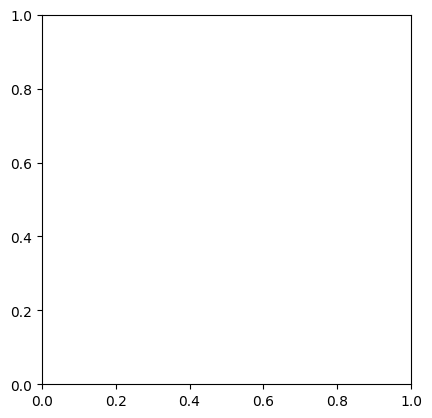

In [15]:
# display img

import matplotlib.pyplot as plt
plt.imshow(img.transpose(1,2,0))